## 1. Fundamental

It can be used for **both classification and regression** problems. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that **stores all available cases** and **classifies** new cases **by a majority vote** of its k neighbors. The case being assigned to the class is **most common** amongst its **K nearest neighbors** measured by a **distance** function.

These distance functions can be Euclidean, Manhattan, Minkowski and Hamming distance. First three functions are used for continuous function and fourth one (Hamming) for categorical variables. If K = 1, then the case is simply assigned to the class of its nearest neighbor. At times, ***choosing K*** *turns out to be a **challenge** while performing kNN modeling*.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/KNN.png)

KNN can easily be mapped to our real lives. If you want to **learn about a person**, of whom you have no information, you might like to **find out about his close friends** and the circles he moves in and gain access to his/her information!

Things to consider before selecting kNN:

- KNN is computationally expensive
- Variables should be normalized else higher range variables can bias it
- Works on pre-processing stage more before going for kNN like outlier, noise removal

## 2. Simple example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dataset
X = np.array([[1,2], [4,7], [1.5,1.8], [5,6], [1,0.6], [5.5,8], [2,3], [4,6]])
y = np.array([0,1,0,1,0,1,0,1])

In [3]:
# build model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

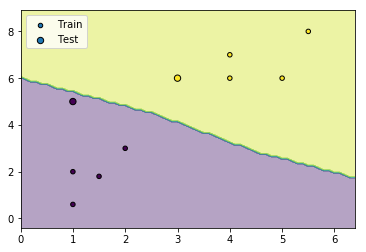

In [4]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', label='Train')

Xtest = np.array([[1,5], [3,6]])
Ytest = neigh.predict(Xtest)

plt.scatter(Xtest[:, 0], Xtest[:, 1], c=Ytest, s=40, edgecolor='k', label='Test')
plt.legend()
plt.show()

## 3. Example with iris dataset

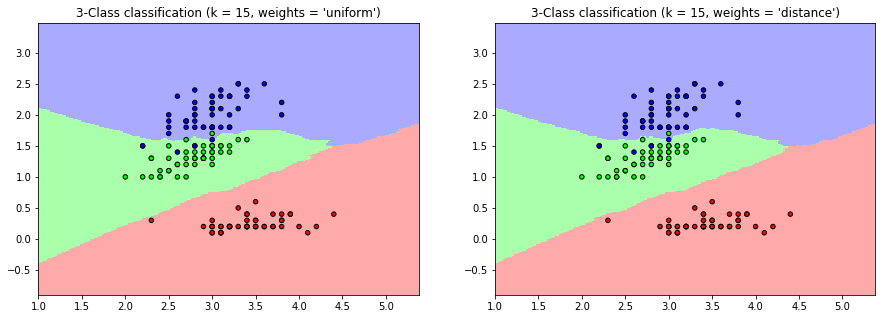

In [5]:
# with iris dataset
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
iris = load_iris()
n_neighbors = 15
# import some data to play with
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, [1,3]]
y = iris.target
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
ww = ['uniform', 'distance'] 
plt.figure(figsize=(15,5))

for i in [0, 1]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=ww[i])
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,i+1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.axis([xx.min(), xx.max(), yy.min(), yy.max()])
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, ww[i]))

plt.show()

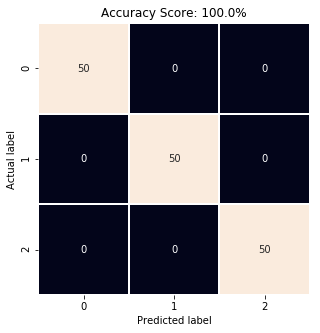

In [6]:
# build model
clf = KNeighborsClassifier(n_neighbors=15,  weights='distance')
clf.fit(X=iris.data, y=iris.target)
prediction = clf.predict(iris.data)

# calculate confusion matrices
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=iris.target, y_pred=prediction)
acc = clf.score(X=iris.data, y=iris.target)

# visualization with seaborn
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=1, square = True, cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: %.1f'%(acc*100) + '%'
plt.title(all_sample_title, size = 12)
plt.show()

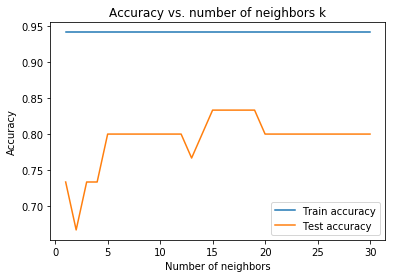

In [7]:
# accuracy vs number of neighbours
# train only on sepal parameters as the dataset is small, the effect of k is not clear.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = \
train_test_split(iris.data[:, 0:2], iris.target, test_size=0.2, random_state=42)

train_acc = []
test_acc = []
k_max = 30

for k in range(1, k_max+1):
    clf = KNeighborsClassifier(n_neighbors=k,  weights='distance')
    clf.fit(Xtrain, Ytrain)
    
    train_acc.append(clf.score(Xtrain, Ytrain))
    test_acc.append(clf.score(Xtest, Ytest))

# plot the result
plt.plot(range(1, k_max+1), train_acc, label='Train accuracy')
plt.plot(range(1, k_max+1), test_acc, label='Test accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. number of neighbors k')
plt.legend()
plt.show()

As we can see from the graph, k = 15 is the best value